In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df_skew = pd.read_csv("data/Titanic_ML.csv", usecols=["Age", "Fare"])
df_skew.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


C:\Users\user\AppData\Local\Temp\ipykernel_18932\3013331848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_skew["Age"], palette="Dark2")


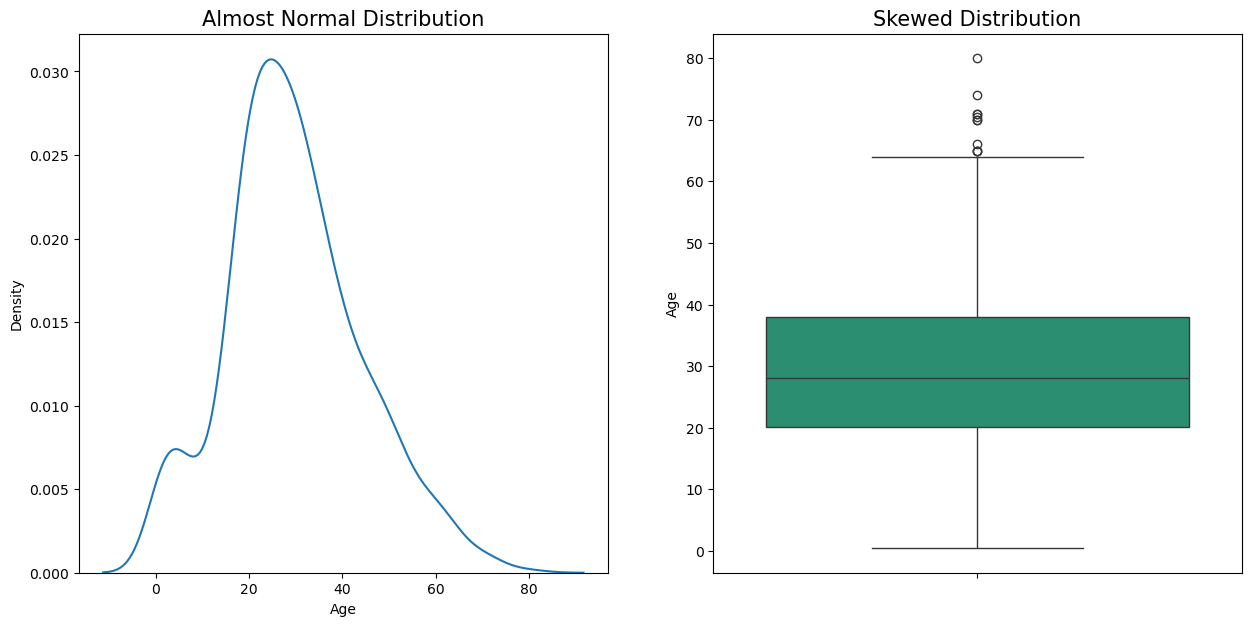

In [28]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Almost Normal Distribution", fontsize=15)
sns.kdeplot(data = df_skew["Age"])
plt.subplot(1,2,2)
plt.title("Skewed Distribution", fontsize=15)
sns.boxplot(data=df_skew["Age"], palette="Dark2")
plt.show()

<h2>Trimming And Standard Deviation</h2>
Trimming is the method of getting rid of the outliers at the end of the dataset. This is easier than all other methods

In [30]:
# Defining lower and Upper limit
norm_upper_limit = df_skew["Age"].mean() + 3 * df_skew["Age"].std()
norm_lower_limit = df_skew["Age"].mean() - 3 * df_skew["Age"].std()

In [31]:
# Trimming the outliers away and we only have the distribution in 3 standard deviation
df_normal_new = ((df_skew["Age"] > norm_lower_limit) & (df_skew['Age'] < norm_upper_limit))

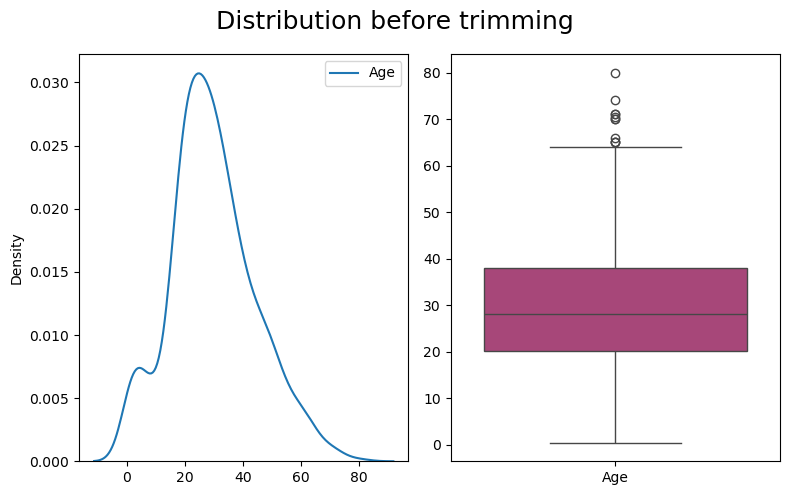

In [32]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before trimming", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_skew)
plt.subplot(1,2,2)
sns.boxplot(data = df_skew, palette="magma")
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_18932\923427232.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_normal_new, palette="magma")


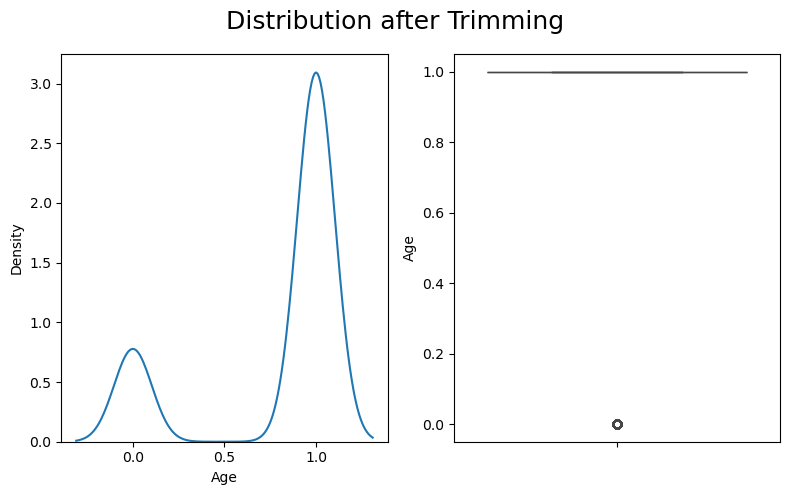

In [33]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Trimming",fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_normal_new)
plt.subplot(1,2,2)
sns.boxplot(data = df_normal_new, palette="magma")
plt.tight_layout()
plt.show()

<h2>Capping and Inter-Quartile Range (IQR)</h2>
Capping is setting a limit for the feature and set the value of all the outliers exceeding the limit to the value of tht limit.

In [37]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_skew["Fare"].quantile(0.25)
q2 = df_skew["Fare"].quantile(0.75)

In [38]:
#finding out the value of Inter Quartile Range
IQR = q2 - q1

In [39]:
#defining max and min limits
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 

In [40]:
#capping
df_skew_new = pd.DataFrame(np.where(df_skew["Fare"] > max_limit, max_limit, (np.where(df_skew["Fare"] < min_limit, min_limit, df_skew["Fare"]))), columns=["Fare"])

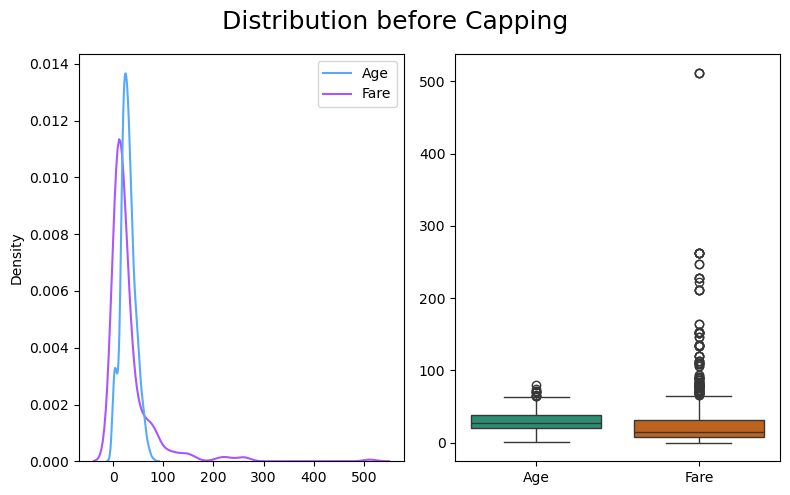

In [41]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_skew, palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df_skew, palette="Dark2")
plt.tight_layout()
plt.show()

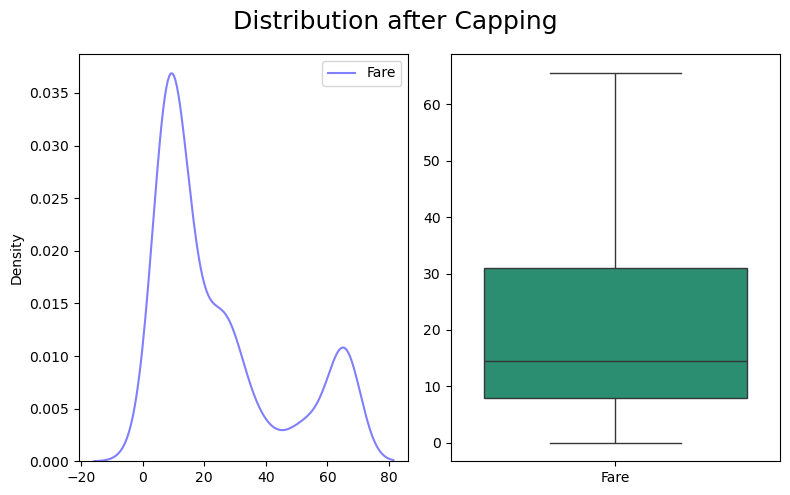

In [42]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Capping",fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_skew_new, palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df_skew_new, palette="Dark2")
plt.tight_layout()
plt.show()